In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D,Dense,MaxPooling2D,Dropout,Flatten
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
import random
import ntpath

In [4]:
datadir = "D:/data-master"

In [5]:
columns = ['center','left','right','steering','throttle','reverse','speed']

In [8]:
dataset = pd.read_csv(os.path.join("D:/data-master/driving_log.csv"),names=columns)

In [9]:
os.path.join("D:/data-master/driving_log.csv")

'D:/data-master/driving_log.csv'

In [10]:
dataset.head()

,center,left,right,steering,throttle,reverse,speed
0,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000078
1,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000078
2,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000079
3,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000078
4,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000079


In [11]:
#Extract the file path
def removePath(path):
  base,tail = ntpath.split(path)
  return tail

In [12]:
#Transfare the file paths to file names
dataset['center'] = dataset['center'].apply(removePath)

In [13]:
#Transfare the file paths to file names
dataset['left'] = dataset['left'].apply(removePath)

In [14]:
##Transfare the file paths to file names
dataset['right'] = dataset['right'].apply(removePath)

In [15]:
dataset.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_10_17_16_36_30_865.jpg,left_2018_10_17_16_36_30_865.jpg,right_2018_10_17_16_36_30_865.jpg,0.0,0.0,0.0,0.000078
1,center_2018_10_17_16_36_30_966.jpg,left_2018_10_17_16_36_30_966.jpg,right_2018_10_17_16_36_30_966.jpg,0.0,0.0,0.0,0.000078
2,center_2018_10_17_16_36_31_098.jpg,left_2018_10_17_16_36_31_098.jpg,right_2018_10_17_16_36_31_098.jpg,0.0,0.0,0.0,0.000079
3,center_2018_10_17_16_36_31_253.jpg,left_2018_10_17_16_36_31_253.jpg,right_2018_10_17_16_36_31_253.jpg,0.0,0.0,0.0,0.000078
4,center_2018_10_17_16_36_31_366.jpg,left_2018_10_17_16_36_31_366.jpg,right_2018_10_17_16_36_31_366.jpg,0.0,0.0,0.0,0.000079


In [16]:
num_bins = 25

In [17]:
hist,bins = np.histogram(dataset['steering'],num_bins)

In [18]:
print(hist)
print(bins)

[  48   16   13   15   21   36   48   69  161  174  337  239 5454   56
  160   82   97   99   37   25   32   15   12    5    8]
[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


In [20]:
center = (bins[:-1]+bins[1:])*0.5
center

array([-0.96, -0.88, -0.8 , -0.72, -0.64, -0.56, -0.48, -0.4 , -0.32,
       -0.24, -0.16, -0.08,  0.  ,  0.08,  0.16,  0.24,  0.32,  0.4 ,
        0.48,  0.56,  0.64,  0.72,  0.8 ,  0.88,  0.96])

In [22]:
center1 = []
for i in range(0,len(bins)-1):
  x = (bins[i] + bins[i+1]) * 0.5
  center1.append(x)
center1

[-0.96,
 -0.88,
 -0.8,
 -0.72,
 -0.6399999999999999,
 -0.56,
 -0.48,
 -0.39999999999999997,
 -0.32,
 -0.24,
 -0.15999999999999998,
 -0.08000000000000002,
 0.0,
 0.08000000000000007,
 0.16000000000000003,
 0.24,
 0.32000000000000006,
 0.4,
 0.48,
 0.56,
 0.64,
 0.72,
 0.8,
 0.88,
 0.96]

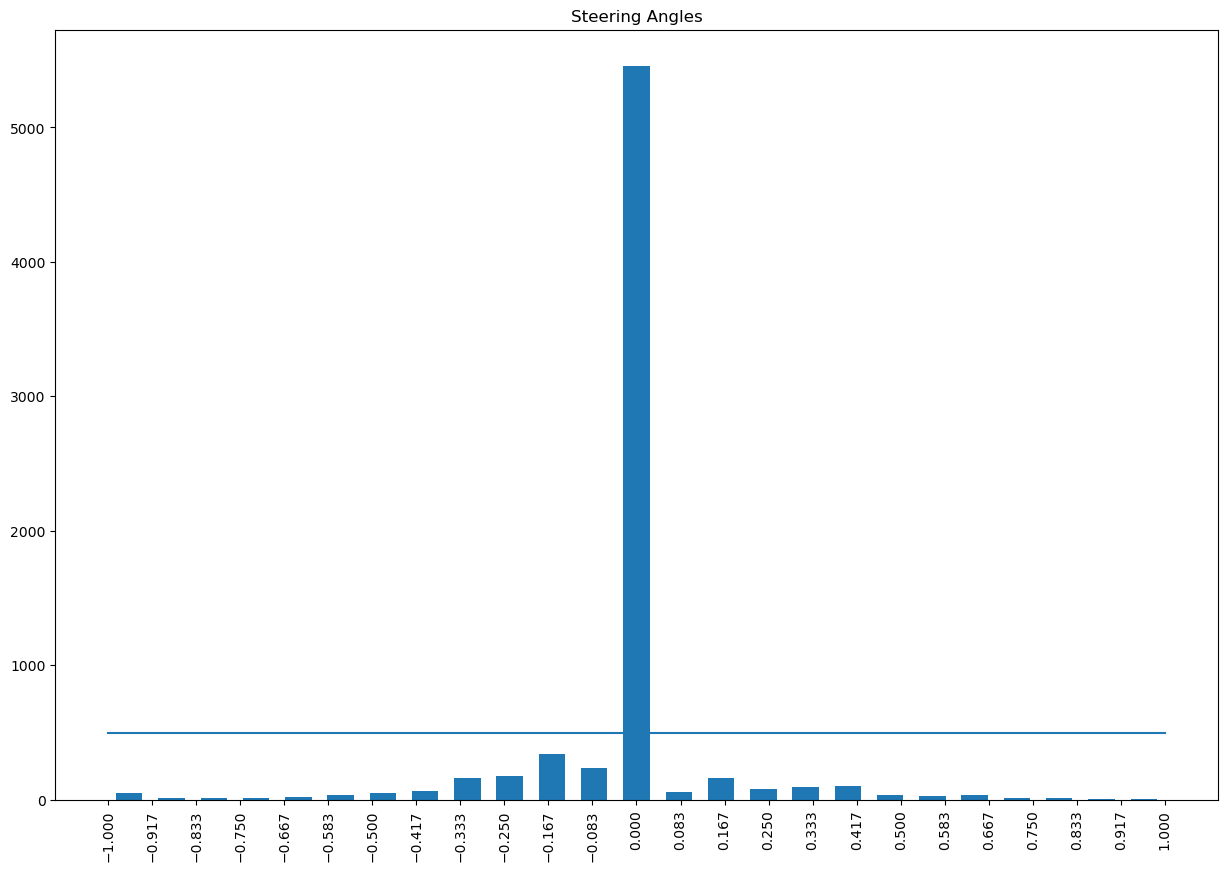

In [23]:
threshold = 500
plt.figure(figsize=(15,10))
plt.bar(center,hist,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=90)
(x1,x2) = (np.min(dataset['steering']),np.max(dataset['steering']))
(y1,y2) = (threshold,threshold)
plt.title('Steering Angles')
plt.plot((x1,x2),(y1,y2))

In [24]:
remove_list = []
for i in range(num_bins):
  List = []
  for j in range(len(dataset['steering'])):
    if dataset['steering'][j] >= bins[i] and dataset['steering'][j] <= bins[i+1]:
      List.append(j)
  List = shuffle(List)
  List = List[threshold:]
  remove_list.extend(List)

In [25]:
len(dataset['steering']) 

7259

In [26]:
len(remove_list)

4954

In [27]:
dataset.drop(dataset.index[remove_list],inplace=True)

In [28]:
hist,_ = np.histogram(dataset['steering'],num_bins)

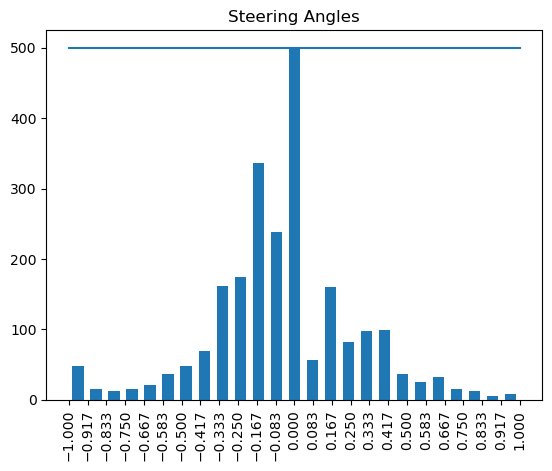

In [29]:
plt.bar(center,hist,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=90)
(x1,x2) = (np.min(dataset['steering']),np.max(dataset['steering']))
(y1,y2) = (threshold,threshold)
plt.title('Steering Angles')
plt.plot((x1,x2),(y1,y2))

In [30]:
dataset.iloc[1]

center      center_2018_10_17_16_36_32_196.jpg
left          left_2018_10_17_16_36_32_196.jpg
right        right_2018_10_17_16_36_32_196.jpg
steering                                   0.0
throttle                                   0.0
reverse                                    0.0
speed                                 0.000079
Name: 11, dtype: object

In [32]:
datadir

'D:/data-master'

In [33]:
def loadImageSteering(datadir,dataset):
  imagePath = []
  steeringPath = []
  for i in range(len(dataset)):
    center = dataset.iloc[i][0]
    steering = float(dataset.iloc[i][3])
    imagePath.append(os.path.join(datadir,center))
    steeringPath.append(steering)
  imagePath = np.asarray(imagePath)
  steeringPath = np.asarray(steeringPath)
  return imagePath,steeringPath

In [34]:
dataset.iloc[0][0]

'center_2018_10_17_16_36_30_966.jpg'

In [35]:
imagePath,steeringPath = loadImageSteering(datadir+'/IMG',dataset)

In [36]:
imagePath[0]

'D:/data-master/IMG\\center_2018_10_17_16_36_30_966.jpg'

In [37]:
len(steeringPath)

2305

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = train_test_split(imagePath,steeringPath,random_state=6,test_size=0.2)

In [40]:
len(x_train)

1844

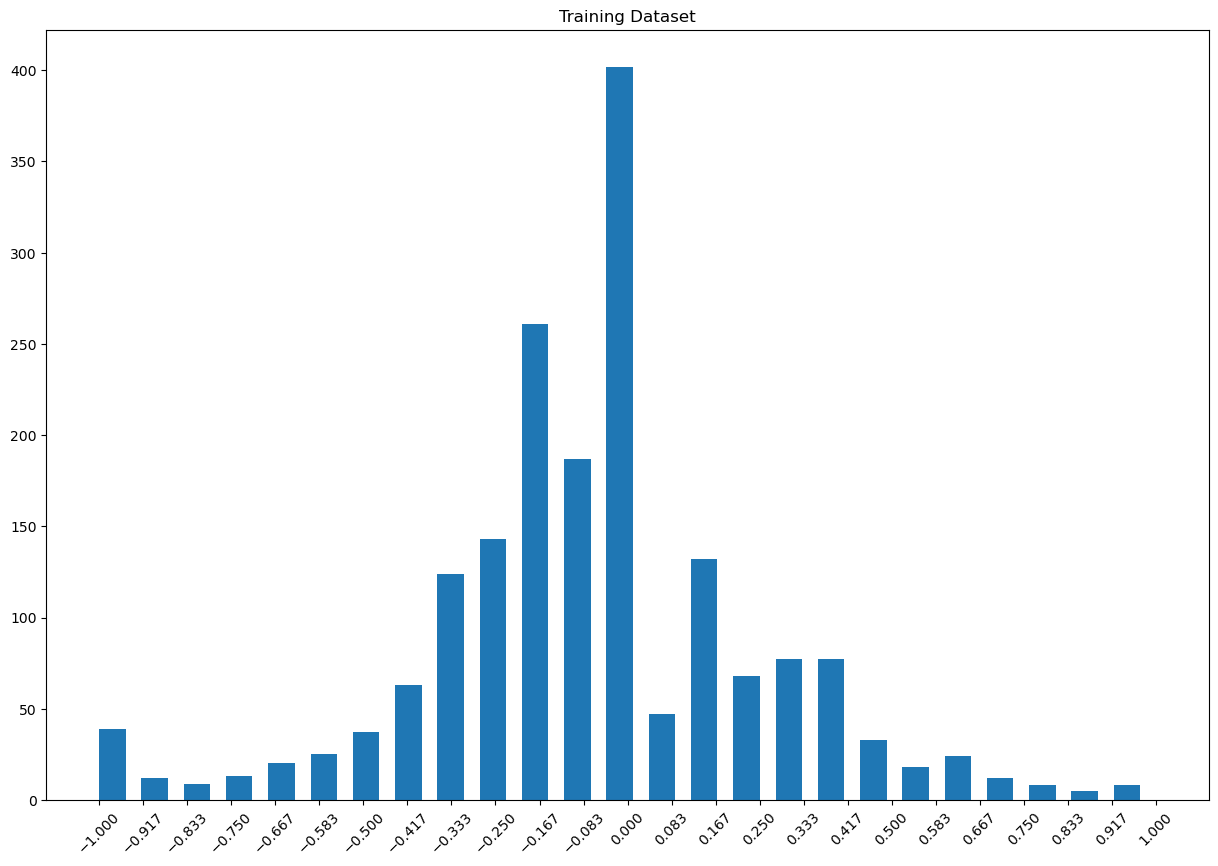

In [41]:
plt.figure(figsize=(15,10))
plt.hist(y_train,bins=num_bins,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=45)
plt.title("Training Dataset")
plt.show()

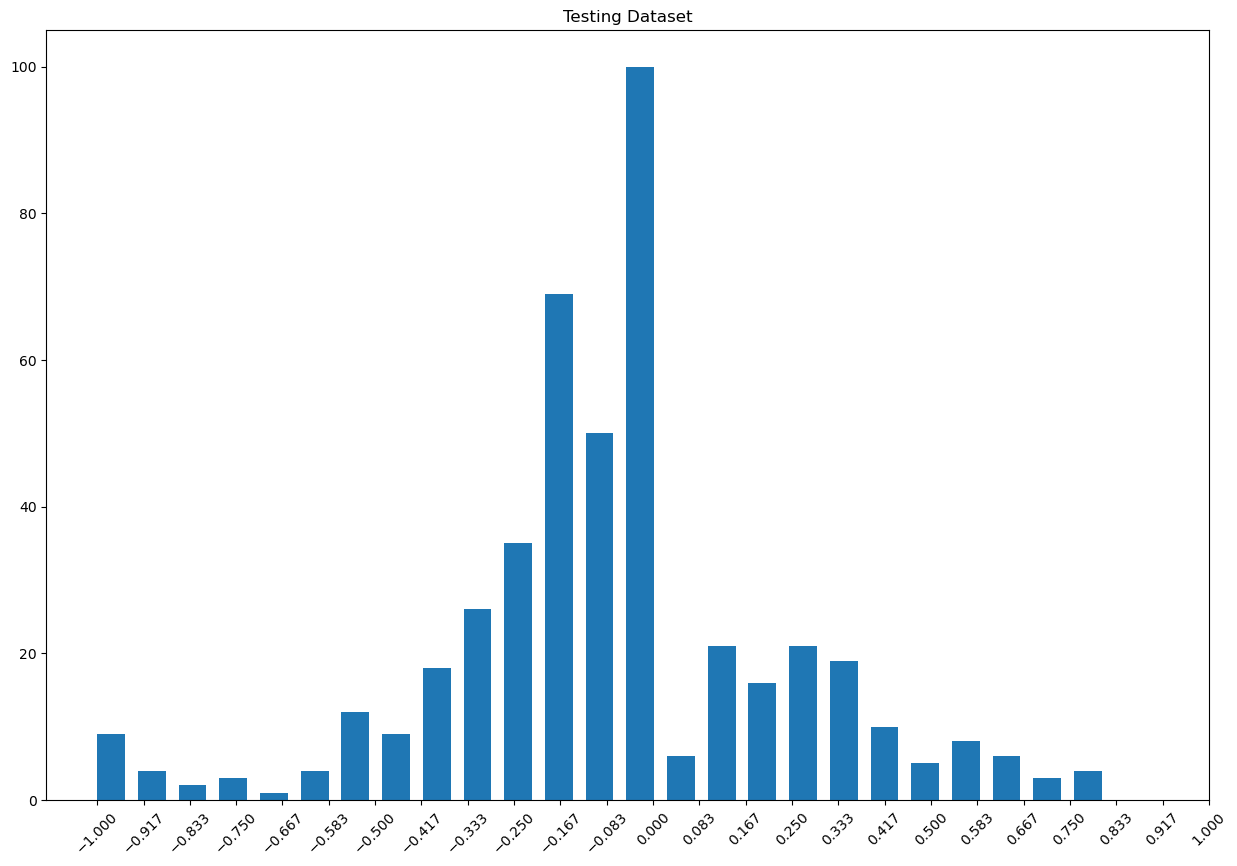

In [42]:
plt.figure(figsize=(15,10))
plt.hist(y_test,bins=num_bins,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=45)
plt.title("Testing Dataset")
plt.show()

In [43]:
def imagePreprocessing(img):
  img = mpimg.imread(img)
  img = img[60:135,:,:]
  img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img,(3,3),0)
  img = cv2.resize(img,(200,66))
  img = img/255
  return img

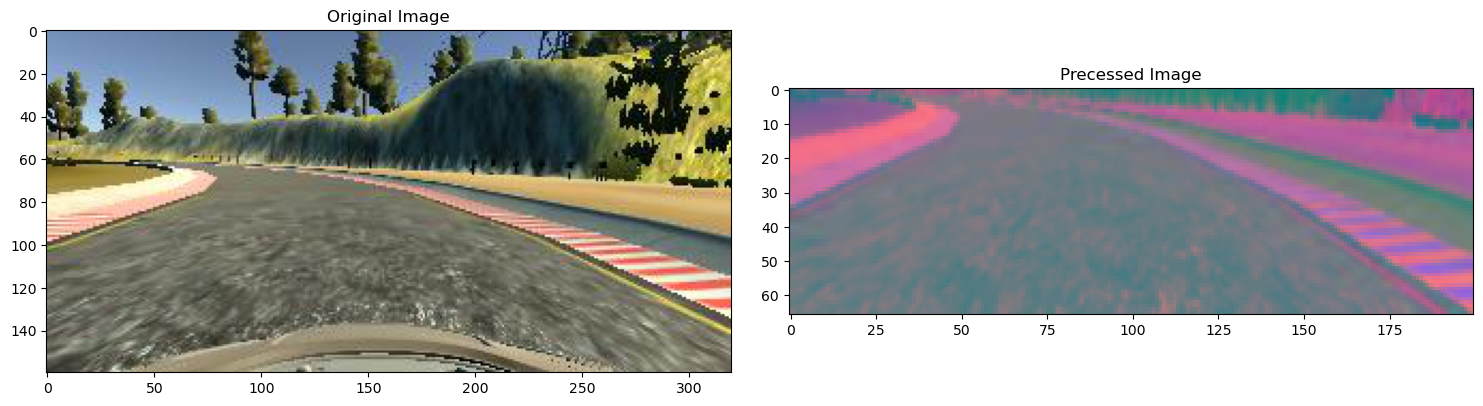

In [44]:
image = imagePath[1]
image = mpimg.imread(image)
fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].grid(False)
axs[0].set_title("Original Image")
axs[1].imshow(imagePreprocessing(imagePath[1]))
axs[1].grid(False)
axs[1].set_title("Precessed Image")
plt.show()

In [45]:
x_train = np.array(list(map(imagePreprocessing,x_train)))

In [46]:
x_test = np.array(list(map(imagePreprocessing,x_test)))

In [47]:
def nvidiaModel():
  model = Sequential()
  model.add(Convolution2D(24,(5,5),strides=(2,2),input_shape=(66,200,3),activation="elu"))
  model.add(Convolution2D(36,(5,5),strides=(2,2),activation="elu"))
  model.add(Convolution2D(48,(5,5),strides=(2,2),activation="elu")) 
  model.add(Convolution2D(64,(3,3),activation="elu"))   
  model.add(Convolution2D(64,(3,3),activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  
  model.add(Dense(100,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(50,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(10,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(1))
  model.compile(optimizer=Adam(lr=1e-3),loss="mse")
  
  return model

In [48]:
model = nvidiaModel()

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 dropout (Dropout)           (None, 1, 18, 64)         0         
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [50]:
h = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=100,shuffle=1,verbose=1)

Epoch 1/30



19/19 [==============================] - 3s 68ms/step - loss: 0.4733 - val_loss: 0.0966
Epoch 2/30
19/19 [==============================] - 1s 49ms/step - loss: 0.1589 - val_loss: 0.0929
Epoch 3/30
19/19 [==============================] - 1s 50ms/step - loss: 0.1187 - val_loss: 0.0878
Epoch 4/30
19/19 [==============================] - 1s 51ms/step - loss: 0.1074 - val_loss: 0.0823
Epoch 5/30
19/19 [==============================] - 1s 52ms/step - loss: 0.0960 - val_loss: 0.0789
Epoch 6/30
19/19 [==============================] - 1s 51ms/step - loss: 0.0986 - val_loss: 0.0772
Epoch 7/30
19/19 [==============================] - 1s 52ms/step - loss: 0.0957 - val_loss: 0.0743
Epoch 8/30
19/19 [==============================] - 1s 52ms/step - loss: 0.0895 - val_loss: 0.0743
Epoch 9/30
19/19 [==============================] - 1s 53ms/step - loss: 0.0915 - val_loss: 0.0744
Epoch 10/30
19/19 [==============================] - 1s 51ms/step - loss: 0.0891 - val_loss: 0.0712
Epoch 11/30
19/19 [=

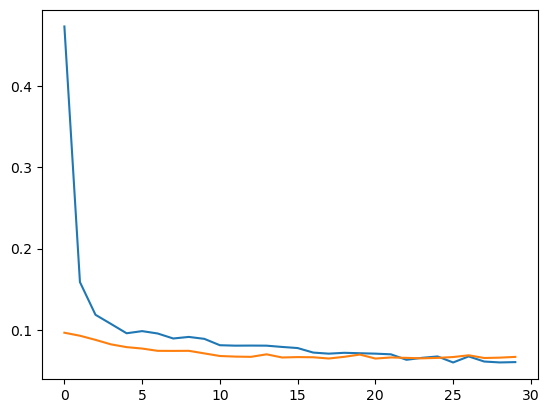

In [51]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

In [52]:
model.save('car.h5')

C:\Users\omars\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
type('car.h5')

str